# Image Enhancement 

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image

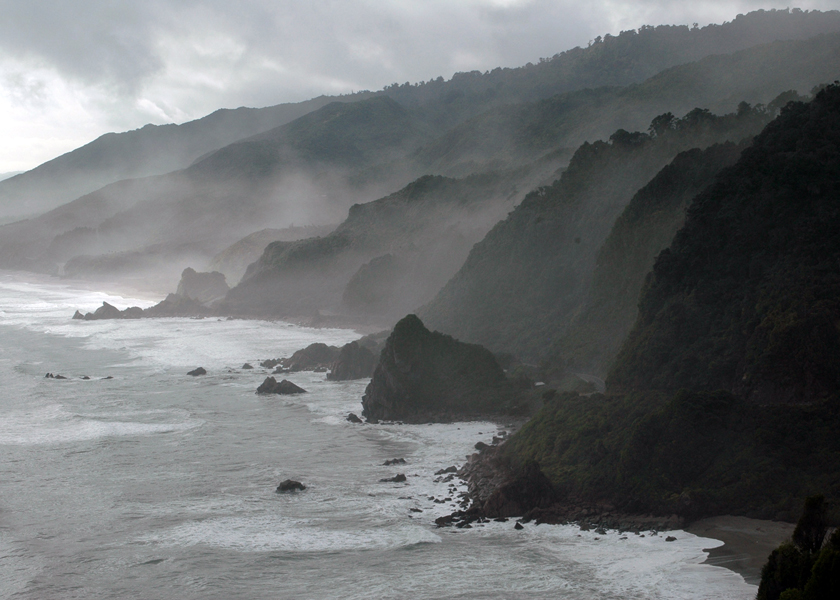

In [2]:
# Original Image
img_bgr = cv2.imread("Images/New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Display 18x18 pixel image.
Image(filename='Images/New_Zealand_Coast.jpg')

## Addition or Brightness

* Simple addition of images. 

* Increasing or decreasing the brightness of the image 

* Increasing or decreasing the intensity values of each pixel by the same amount

* Global increase/decrease in brightness.

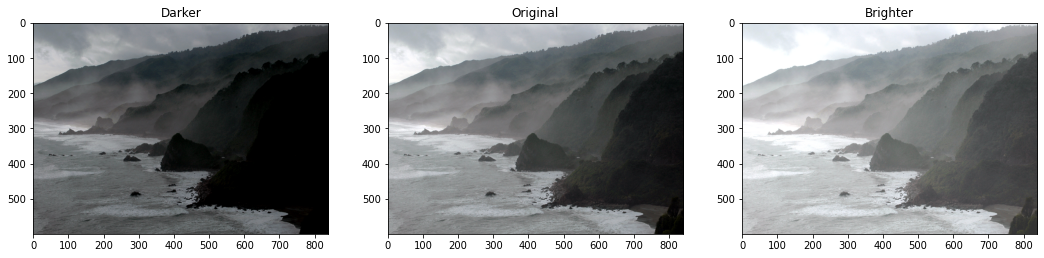

In [3]:
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

## Multiplication or Contrast

* Used to improve the contrast of the image. 

* Difference in the intensity values of the pixels of an image. 

* Multiplying the intensity values with a constant can make the difference larger or smaller ( multiplying factor is < 1 )

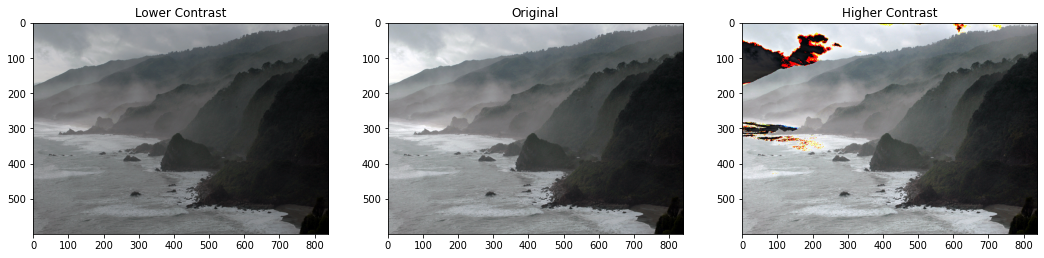

In [10]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

#### Handling Overflow using np.clip

Weird colors in some areas of the image after multiplication !

The issue is that after multiplying, the values which are already high, are becoming greater than 255. Thus, the overflow issue. How do we overcome this?

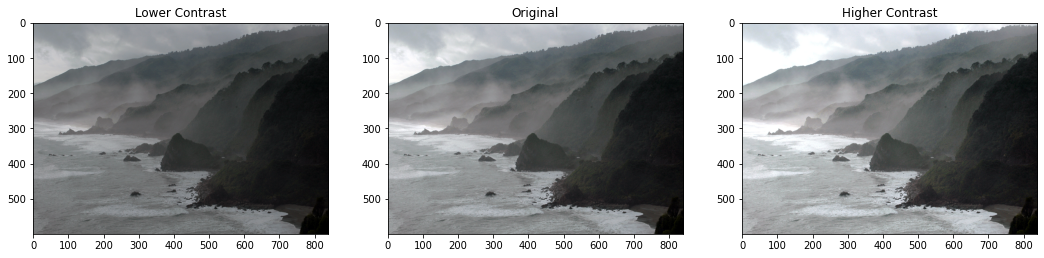

In [9]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0,255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

## Thresholding

**retval, dst = cv2.threshold(src, thresh, maxval, type, dst=None)**


* src: input greyscale image (8-bit or 32-bit floating point)
* thresh: global threshold value
* type: Different types that decide “val_high” and “val_low“. 
* maxval: maximum value to be used with THRESH_BINARY and THRESH_BINARY_INV. Check the below image.

1. cv2.THRESH_BINARY
2. cv2.THRESH_BINARY_INV
3. cv2.THRESH_TRUNC
4. cv2.THRESH_TOZERO
5. cv2.THRESH_TOZERO_INV

![Type](./thres_types.png)


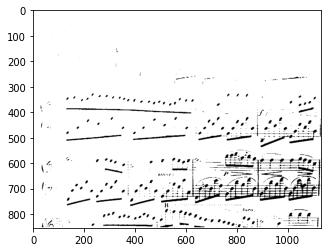

In [14]:
# Read the original image
img_read = cv2.imread("Images/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read,50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
# retval, img_thresh_gbl_2 = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY)

# Display the image
plt.imshow(img_thresh_gbl_1,cmap = 'gray')

#plt.imshow(img_thresh_gbl_2,cmap = 'gray')

**dst = cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)**

* src: 8-bit greyscale image
* thresholdType: Threshold Type
* maxValue: Maximum value assigned to the pixels after thresholding 
* adaptiveMethod: How the threshold is calculated from the pixel neighborhood
* cv2.ADAPTIVE_THRESH_MEAN_C : Mean of the neighborhood area
* cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Weighted sum of the neighborhood area computed using getGaussiankernel() method.
* blockSize: This is the neighborhood size.
* C: a constant which is subtracted from the threshold.

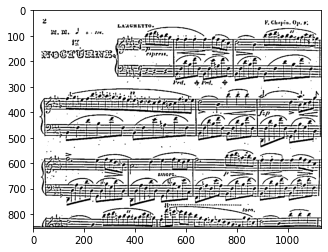

In [17]:
# Perform adaptive thresholding
dst = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Display the image
plt.imshow(dst,cmap='gray')